In [ ]:
Exercises:

1.Modify the mock database to have 100 samples and 3 features. Perform k-means clustering with k=4 and visualize the results using different marker styles for each cluster.

2.Implement a new similarity measure based on Manhattan (cityblock) distance for k-means clustering and compare the clustering performance using Silhouette score and Calinski-Harabasz index with the Euclidean distance measure.

Hint: check the documentation for the cdist function.

3.Generate a new mock database with 5 clusters and 2 features. Perform k-means clustering with different values of k (2, 3, 4, 5, 6) and compare the clustering performance using the elbow method.
Hint: to create the database choose random 5 points (the centroids); generate 5 random values for the clusters radiuses for each centroid in such a way that the circles are disjoint; within eacho of the 5 circles generate 20 random points.

4.Use the iris dataset from Scikit-learn and perform k-means clustering with k=3. Visualize the results using a scatter plot with different marker styles for each cluster. Evaluate the clustering performance using Silhouette score and Calinski-Harabasz index.


[1 3 1 1 1 3 0 3 1 3 0 2 3 0 2 1 2 0 3 0 2 2 2 3 1 2 0 0 3 1 3 1 3 3 2 0 3
 1 3 3 1 1 3 1 2 3 0 1 3 0 3 2 0 1 0 0 1 3 2 2 0 2 2 1 1 3 3 3 1 2 1 0 1 0
 2 1 2 1 3 2 2 0 3 2 1 0 2 2 2 1 1 0 0 1 3 1 3 3 3 1]


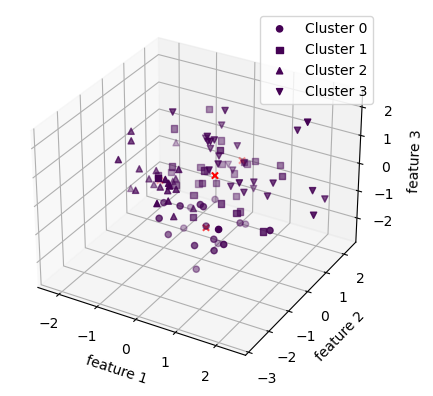

In [18]:
#Exercise 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

def plot_data_clusters(X, labels, centroids):
    # Define a dictionary to map cluster labels to marker styles
    markers = {0: 'o', 1: 's', 2: '^', 3: 'v'}

    # Create a list of marker styles for each data point
    marker_list = [markers[label] for label in labels]

    # Plot the data points and their assigned labels
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for label, marker in markers.items():
        ax.scatter(X[labels == label, 0], X[labels == label, 1], X[labels == label, 2], c=labels[labels == label], marker=marker, label=f'Cluster {label}')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='r', marker='x')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_zlabel('feature 3')
    ax.legend()
    plt.show()
    
# Generate a random dataset with 100 samples and 3 features
np.random.seed(0)
X = np.random.randn(100, 3)

# Specify the number of clusters
k = 4

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)

[1 3 1 1 1 3 0 3 1 3 0 2 3 0 2 1 2 0 3 0 2 2 2 3 1 2 0 0 3 1 3 1 3 3 2 0 3
 1 3 3 1 1 3 1 2 3 0 1 3 0 3 2 0 1 0 0 1 3 2 2 0 2 2 1 1 3 3 3 1 2 1 0 1 0
 2 3 0 1 2 2 2 0 3 2 1 0 2 1 2 1 1 0 0 1 3 1 3 3 3 1]


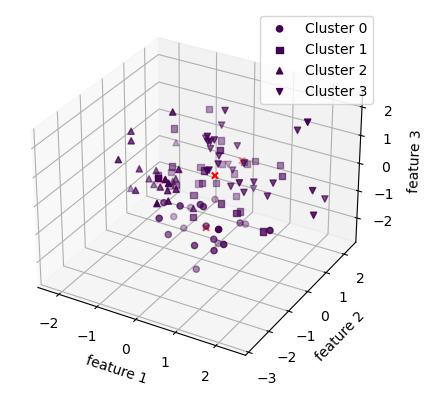

Silhouette score (Manhattan): 0.2562386960913897
Calinski-Harabasz index (Manhattan): 37.444000009902155
Silhouette score (Euclidean): 0.2765793794727097
Calinski-Harabasz index (Euclidean): 36.99663675863867


In [25]:
#Exercise 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score

def plot_data_clusters(X, labels, centroids):
    # Define a dictionary to map cluster labels to marker styles
    markers = {0: 'o', 1: 's', 2: '^', 3: 'v'}

    # Create a list of marker styles for each data point
    marker_list = [markers[label] for label in labels]

    # Plot the data points and their assigned labels
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for label, marker in markers.items():
        ax.scatter(X[labels == label, 0], X[labels == label, 1], X[labels == label, 2], c=labels[labels == label], marker=marker, label=f'Cluster {label}')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='r', marker='x')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_zlabel('feature 3')
    ax.legend()
    plt.show()

# Generate a random dataset with 100 samples and 3 features
np.random.seed(0)
X = np.random.randn(100, 3)

# Specify the number of clusters
k = 4

# Perform k-means clustering on the dataset using Manhattan distance
centroids, _ = kmeans(X, k)
distances = cdist(X, centroids, 'cityblock')
labels = np.argmin(distances, axis=1)

# Print the assigned labels
print(labels)

# Plot the data points and centroids with assigned labels
plot_data_clusters(X, labels, centroids)

# Calculate Silhouette score and Calinski-Harabasz index using Manhattan distance
silhouette_score_manhattan = silhouette_score(X, labels, metric='cityblock')
calinski_harabasz_score_manhattan = calinski_harabasz_score(X, labels)

# Perform k-means clustering on the dataset using Euclidean distance
centroids_euclidean, _ = kmeans(X, k)
labels_euclidean, _ = vq(X, centroids_euclidean)

# Calculate Silhouette score and Calinski-Harabasz index using Euclidean distance
silhouette_score_euclidean = silhouette_score(X, labels_euclidean)
calinski_harabasz_score_euclidean = calinski_harabasz_score(X, labels_euclidean)

# Print the scores
print(f"Silhouette score (Manhattan): {silhouette_score_manhattan}")
print(f"Calinski-Harabasz index (Manhattan): {calinski_harabasz_score_manhattan}")
print(f"Silhouette score (Euclidean): {silhouette_score_euclidean}")
print(f"Calinski-Harabasz index (Euclidean): {calinski_harabasz_score_euclidean}")

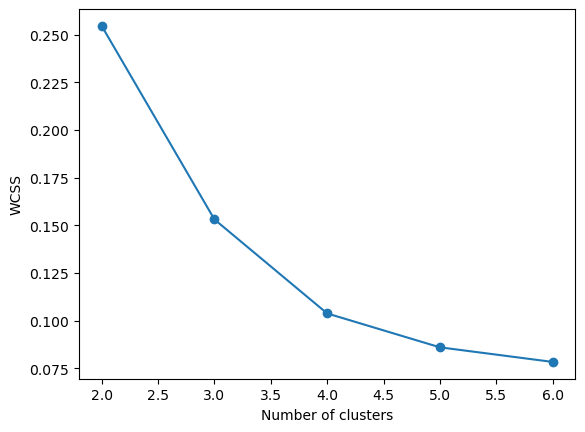

In [29]:
#Exercise 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Generate the mock database
np.random.seed(42)

centroids = np.random.rand(5, 2)
radiuses = np.random.uniform(0.05, 0.2, size=5)

data = np.empty((0, 2))

for i in range(5):
    cluster_points = np.random.rand(20, 2) * radiuses[i] * 2 - radiuses[i] + centroids[i]
    data = np.vstack([data, cluster_points])

# Compute the WCSS for different numbers of clusters
wcss = []
for k in range(2, 7):
    centroids, distortion = kmeans(data, k)
    wcss.append(distortion)

# Plot the WCSS vs. the number of clusters
plt.plot(range(2, 7), wcss, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette score: 0.5528190123564095
Calinski-Harabasz index: 561.62775662962


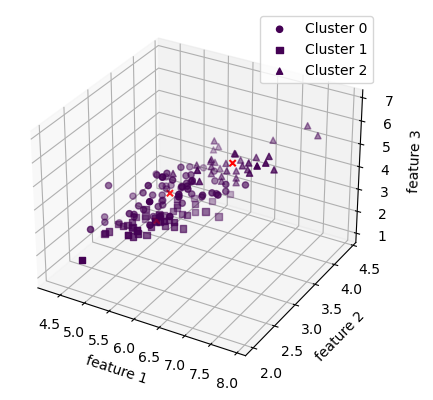

In [30]:
#Exercise 4
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

# define the plot_data_clusters function
def plot_data_clusters(X, labels, centroids):
    # Define a dictionary to map cluster labels to marker styles
    markers = {0: 'o', 1: 's', 2: '^'}

    # Create a list of marker styles for each data point
    marker_list = [markers[label] for label in labels]

    # Plot the data points and their assigned labels
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for label, marker in markers.items():
        ax.scatter(X[labels == label, 0], X[labels == label, 1], X[labels == label, 2], c=labels[labels == label], marker=marker, label=f'Cluster {label}')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='r', marker='x')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_zlabel('feature 3')
    ax.legend()
    plt.show()

# load the iris dataset
iris = load_iris()
X = iris.data

# perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# evaluate clustering performance using Silhouette score and Calinski-Harabasz index
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz_score = calinski_harabasz_score(X, labels)

print("Silhouette score:", silhouette_avg)
print("Calinski-Harabasz index:", calinski_harabasz_score)

# plot the data clusters using the plot_data_clusters function
plot_data_clusters(X, labels, centroids)